<h1 align="center"> Operações unitárias 3

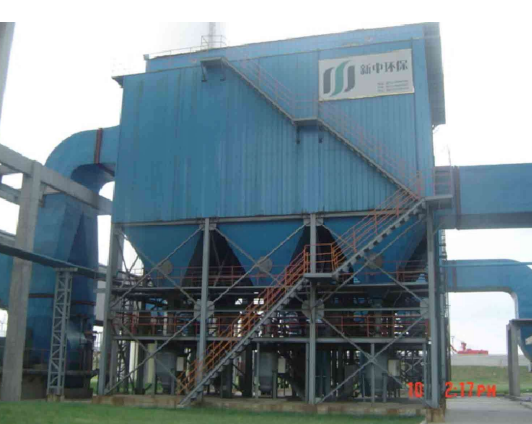

---

<h1 align="center"> Introdução

<h1> # Sistemas multifásicos

Os sistemas que teremos interesses em separar podem ser classificados mediante aos tipos de fases presentes nele.

Desse modo, podemos realizar separações entre as diferentes fases:

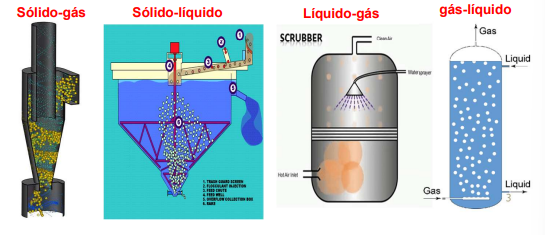

<h1> # Equipamentos que utilizam a força gravitacional

A seguir temos alguns equipamentos que utilizam a força gravitacional para realizar a separação:

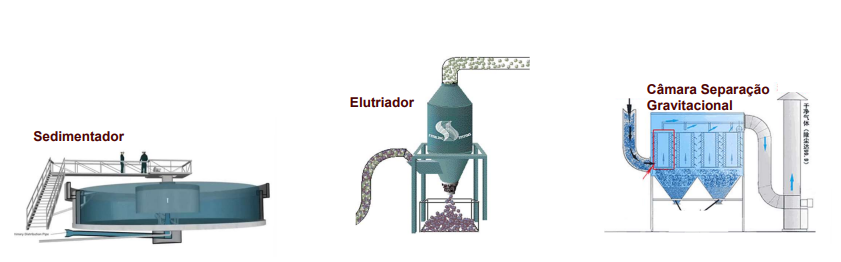

---

<h1 align="center"> Particulas

<h1> # [ 1 ] Reynolds para particulas

O **reynolds para particulas** é calculado da seguinte forma:

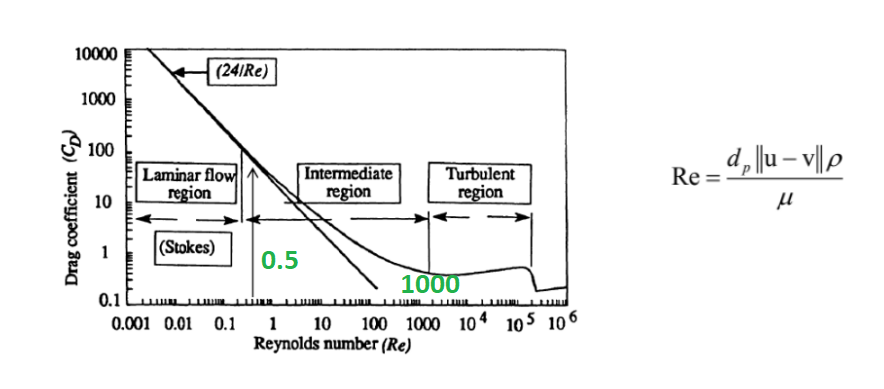

O **coeficiente de arraste** é calculado da seguinte forma:

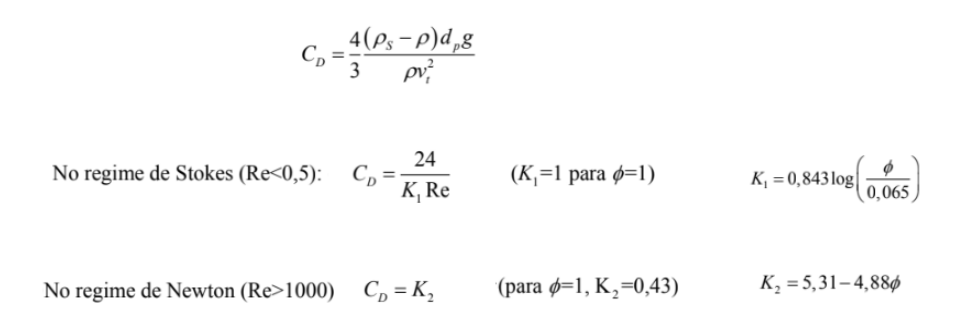


<h1> # [ 2 ] Reynolds para particulas: Correlações

Também podemos calcular o reynolds segundo as correlações:

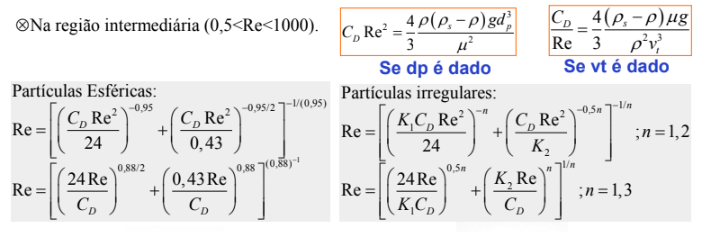

---

<h1 align="center"> Câmara de separação gravitacional

<h1> # [ 1 ] Câmara de Separação Gravitacional: Funcionamento

A câmara de separação gravitacional é dividida mediante as fases sendo separadas:

- **Sólido-gás**: Câmara de poeira (dp>43 um)
- **Sólido-líquido**: Tanque de areia

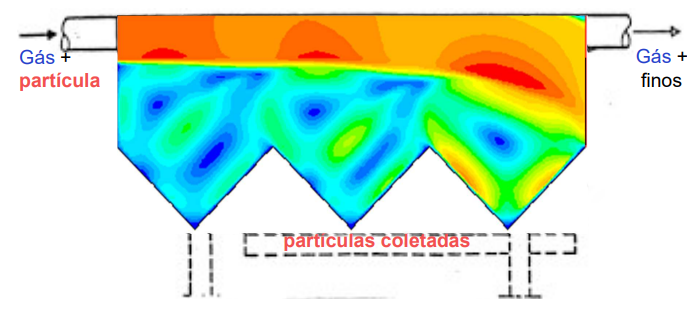

<h1> # [ 2 ] Câmara de Separação Gravitacional: Equacionamento

Considere a figura a seguir e suponha 1 particula escoando nela:

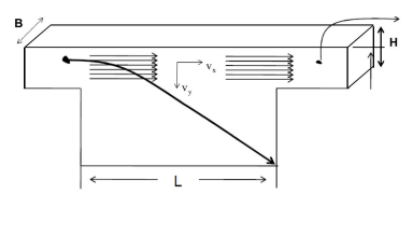

Essa partícula está sobe ação da **força gravitacional**, **empuxo** e **atrito**. Aplicando o balanço de forças temos:

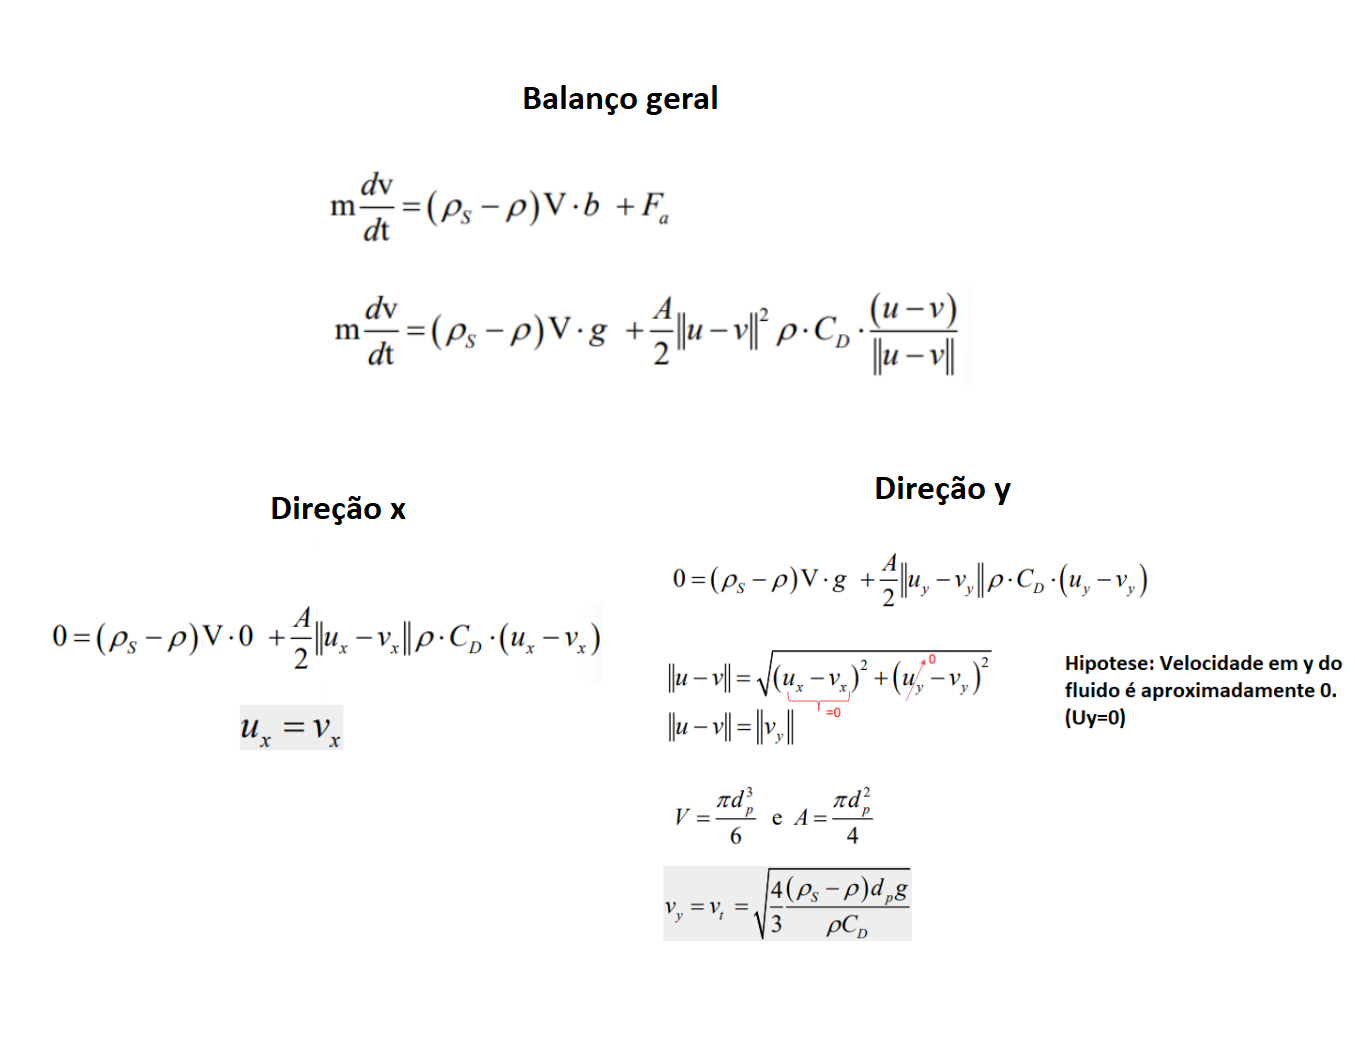

Desse modo, chegamos a duas importantes conclusões:

- A **velocidade do fluido em x** (u<sub>x</sub>) é igual a **velocidade da particula em x** (v<sub>x</sub>)
- A **velocidade da particula em y** (v<sub>y</sub>) é igual sua velocidade terminal.

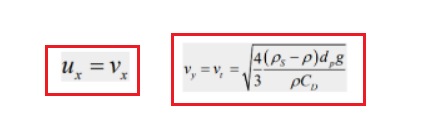

<h1> # [ 3 ] Câmara de Separação Gravitacional: Dimensionamento

Considerando a figura da câmara gravitacional abaixo:

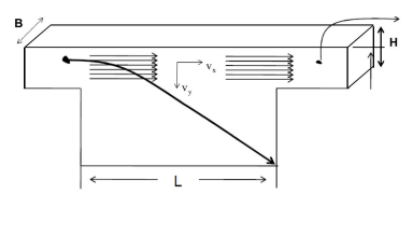

Desse modo temos:

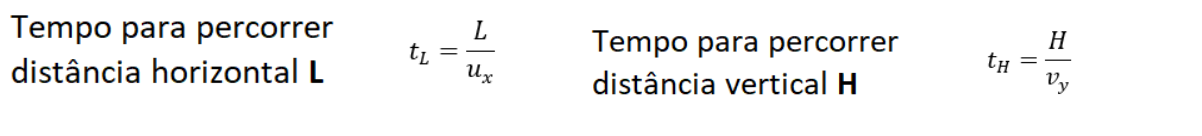

Igualando os tempos, chegamos em:

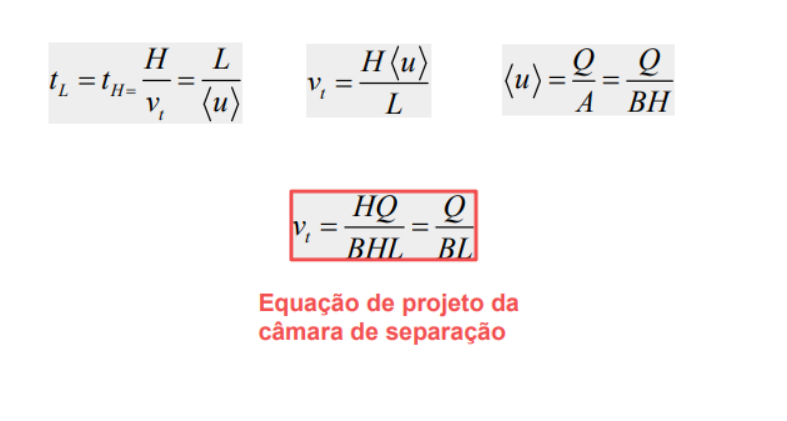

<h1> # [ 4 ] Câmara de Separação Gravitacional: Dimensionamento

Caso tenha duvidas, siga as instruções abaixo:

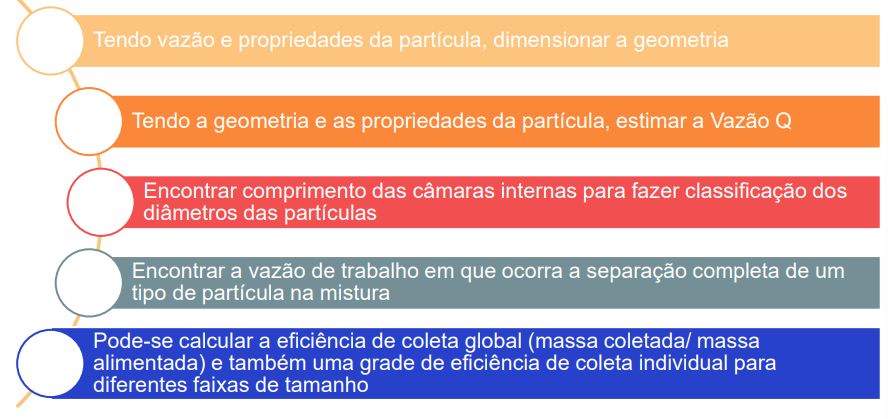

<h1> # [ 1 ] Exemplo: Câmara de separação gravitacional

- Questão:

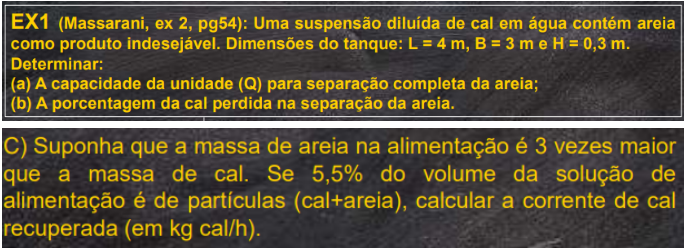

- Resposta:

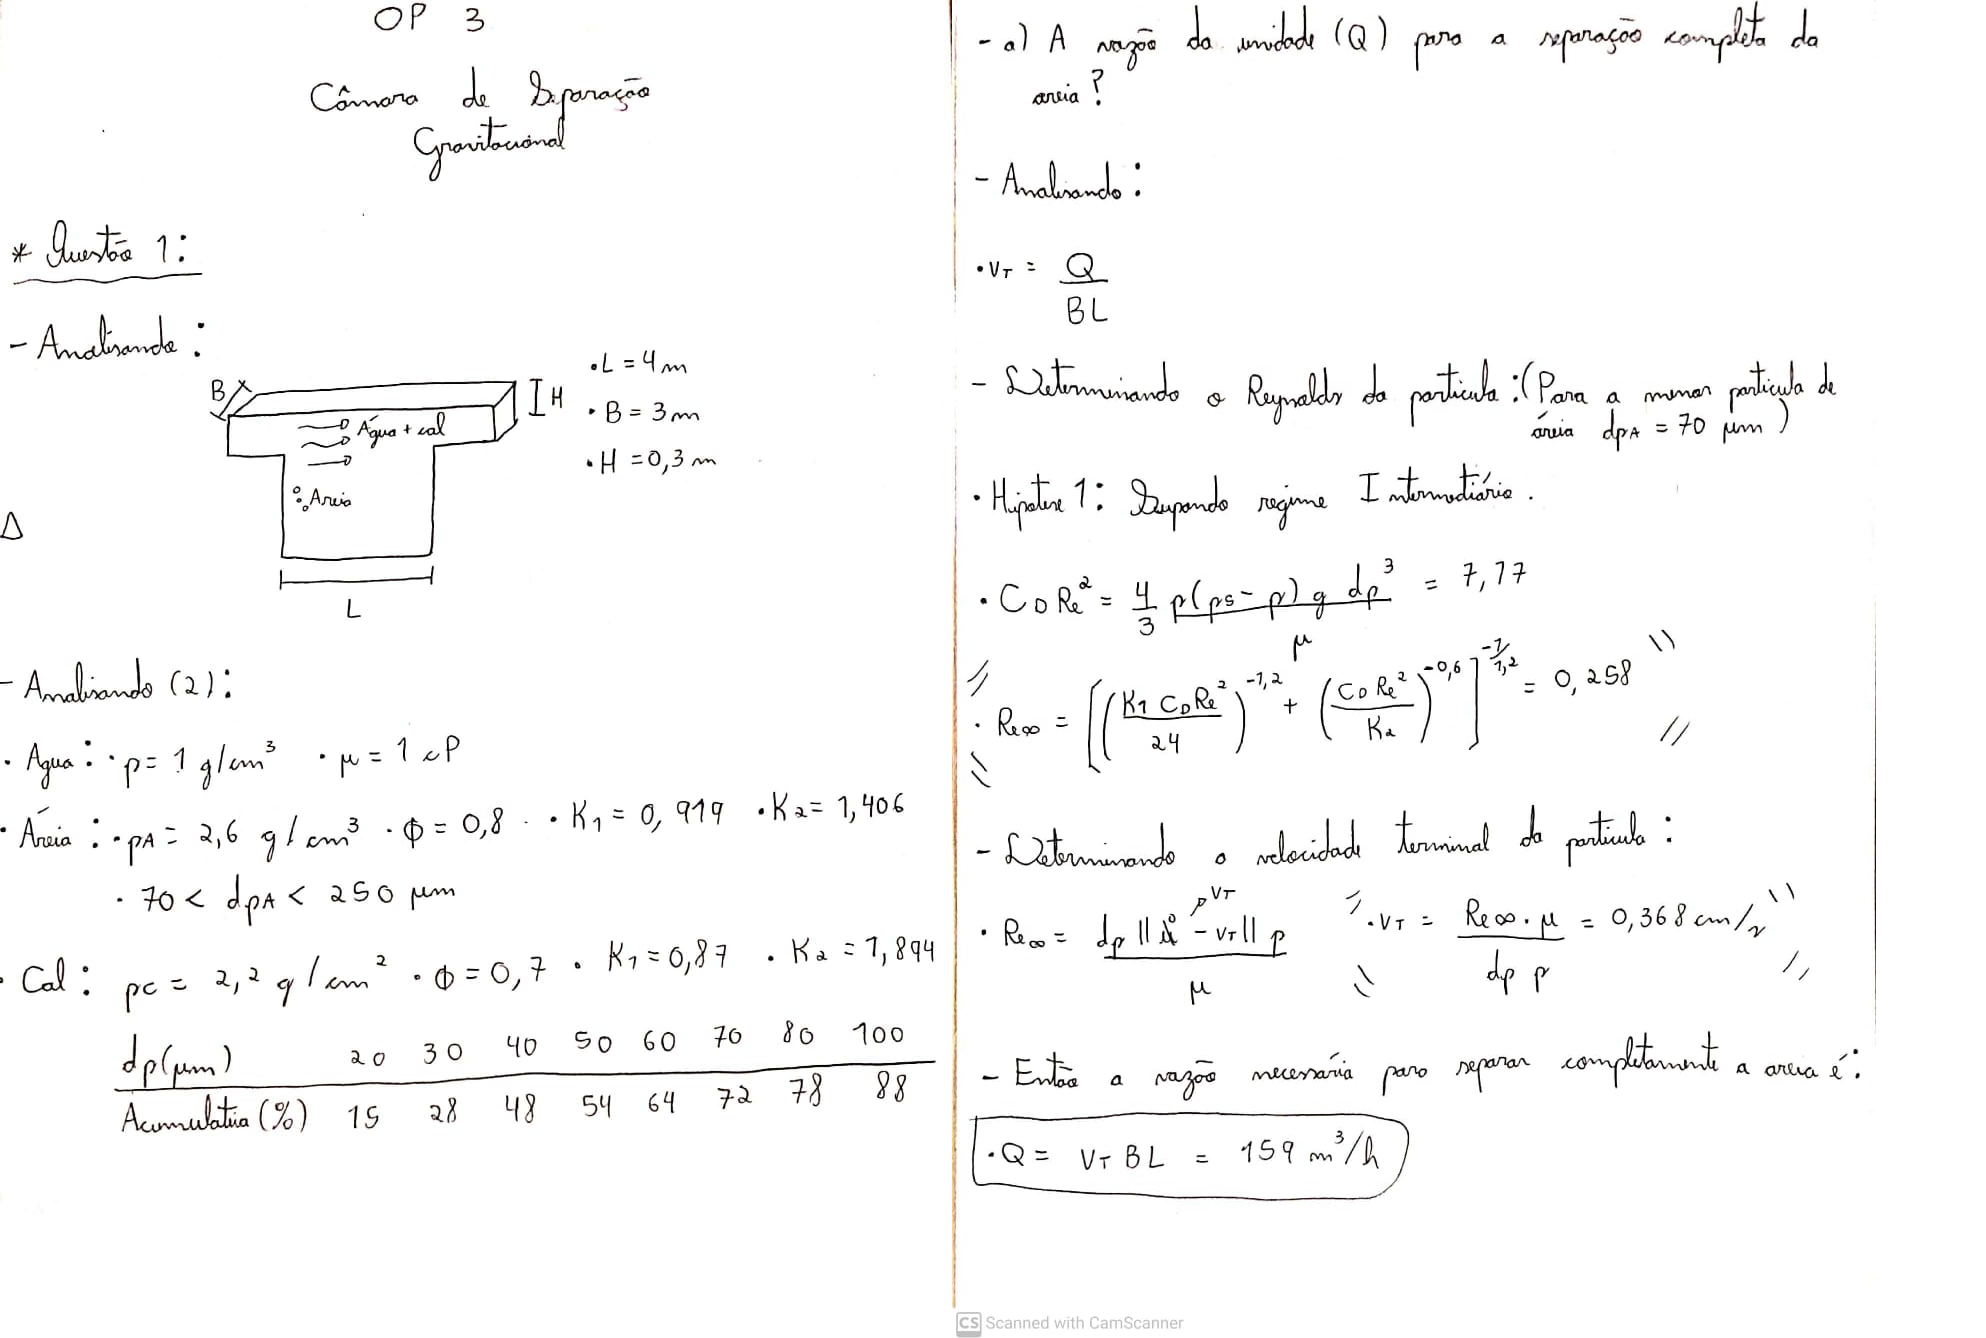

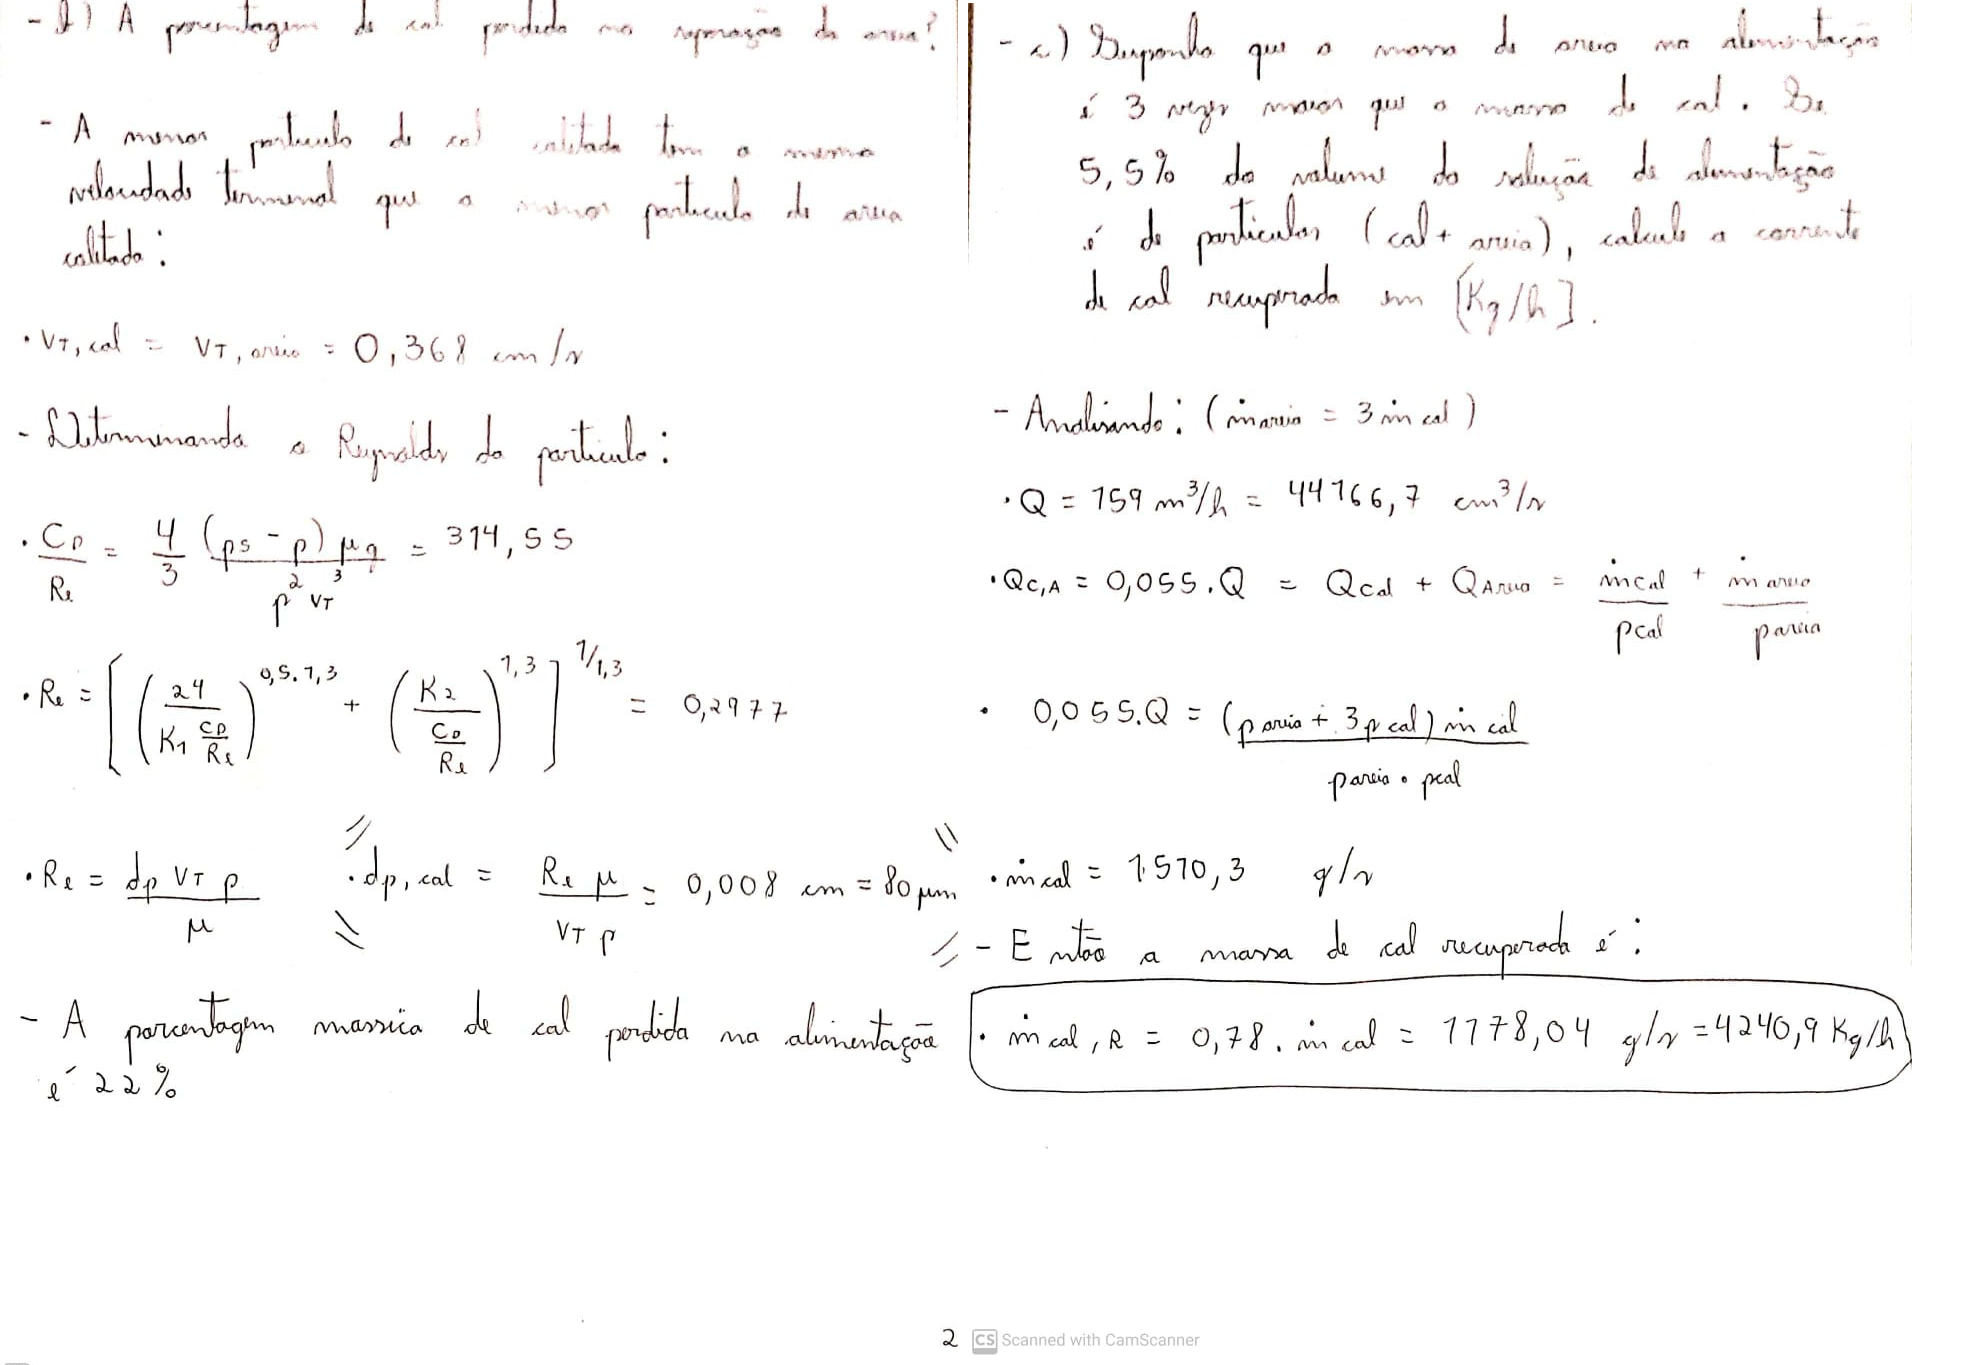

<h1> # [ 2 ] Exemplo: Câmara de separação gravitacional

- Questão:

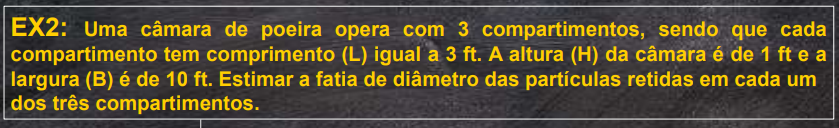

- Resposta:

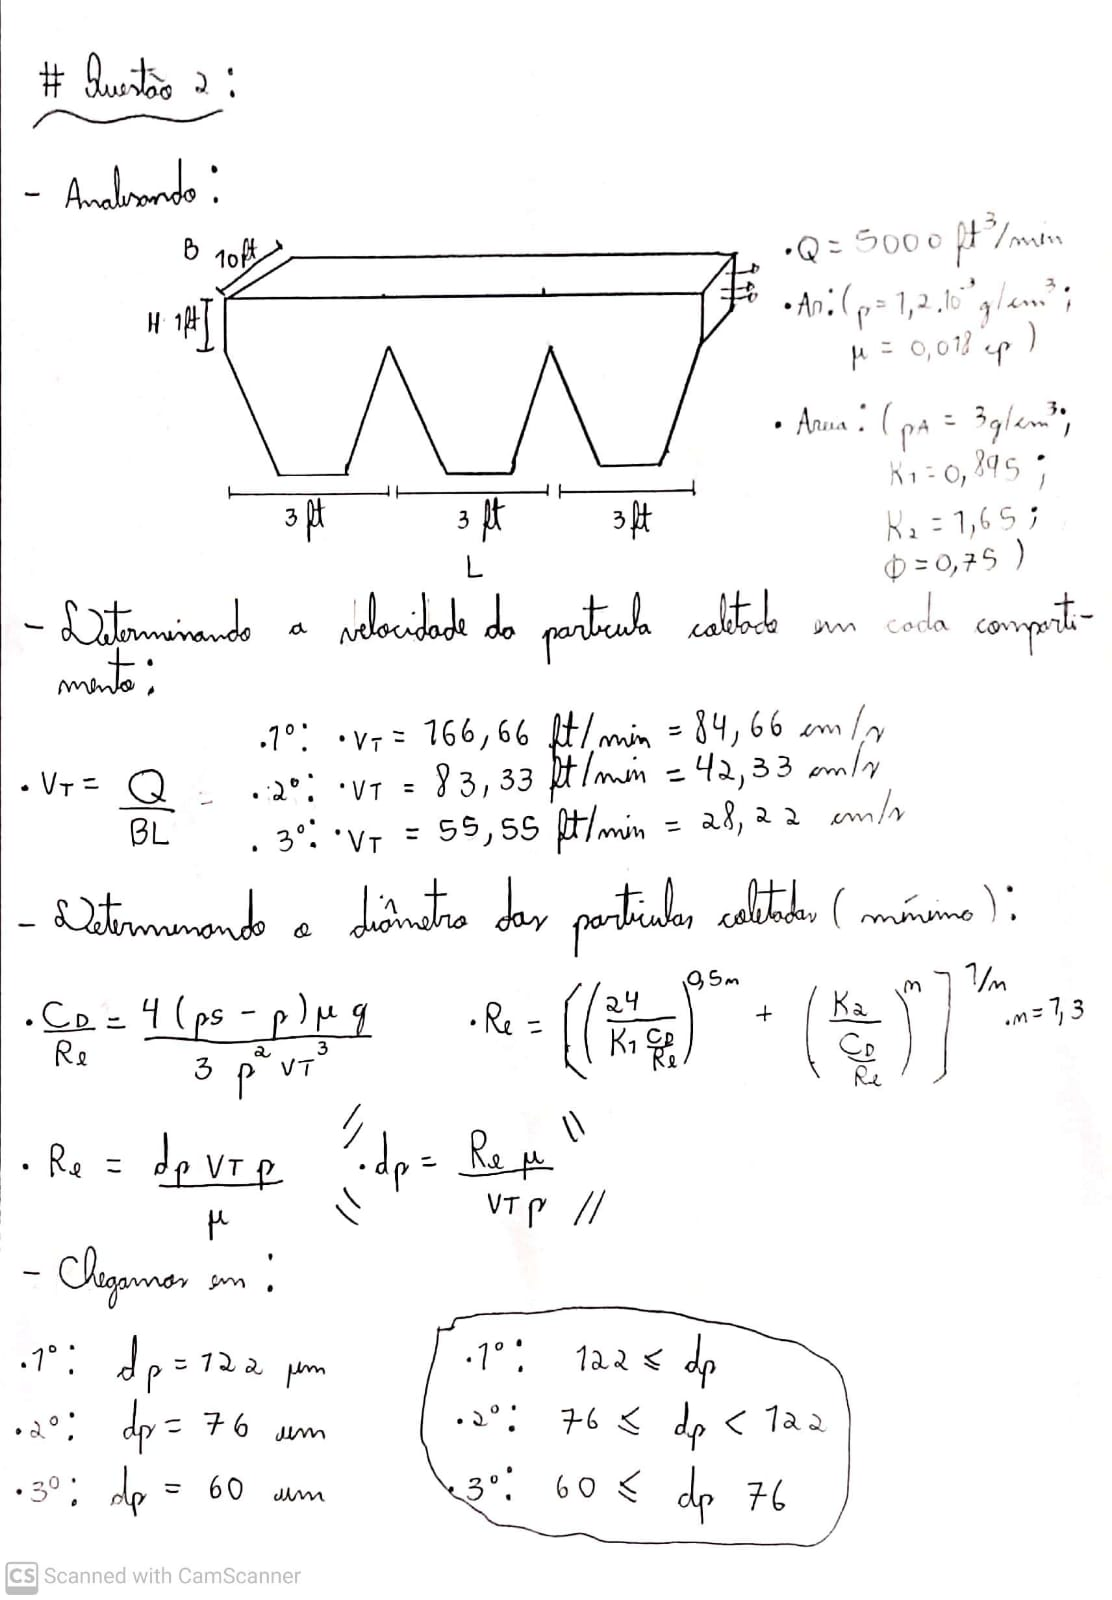


---

<h1 align="center"> Algoritmos

<h1> # Câmara de Separação Gravitacional: Algoritmo

In [22]:
import math

class Particula:
    def __init__(self, ps, esfericidade, dp=None, vt=None, Re=None, nome="Não especificado"):
        self.nome = nome
        self.ps = ps
        self.esfericidade = esfericidade
        self.K1 = 0.843*math.log10(esfericidade/0.065)
        self.K2 = 5.31 - 4.88*esfericidade
        self.dp = dp
        self.vt = vt
        self.Re = Re
        self.CdRe2 = None
        self.Cd_Re = None
        
    def __repr__(self):
        return f"""        ### Relatorio da particula {self.nome} ###
        
        ps = {self.ps}
        esfericidade = {self.esfericidade}
        K1 = {self.K1}
        K2 = {self.K2}
        dp = {self.dp}
        vt = {self.vt}
        Re = {self.Re}
        CdRe2 = {self.CdRe2}
        Cd_Re = {self.Cd_Re}
        
        ### ------------------- ###\n"""

    

class Fluido:
    def __init__(self, pf, u, nome="Não especificado", cm=True):
        
        self.pf = pf
        self.u = u
        self.g = 981 if cm else 9.81     # cm³/s or m/s
        self.nome = nome
        self.particulas = {}
        
    
    def add_particula(self, particula, nome):
        self.particulas[nome] = particula
        
        
    def Re_with_dp(self, dp, nome):
        part = self.particulas[nome]
        part.dp = dp
        n = 4*self.pf*(part.ps-self.pf)*self.g*part.dp**3
        d = 3*self.u**2
        CdRe2 =n/d; part.CdRe2 = CdRe2
        if part.esfericidade == 1:
            Re = ( (CdRe2/24)**(-0.95) + (CdRe2/0.43)**(-0.95/2) )**(-1/0.95)
        else:
            Re = ( (part.K1*CdRe2/24)**(-1.2) + (CdRe2/part.K2)**(-0.5*1.2) )**(-1/1.2)
        part.Re = Re
        part.vt = Re*self.u/(part.dp*self.pf)

        
    def Re_with_vt(self, vt, nome):
        part = self.particulas[nome]
        part.vt = vt
        n = 4*(part.ps-self.pf)*self.u*self.g
        d = 3*self.pf**(2)*part.vt**(3)
        print("denominador")
        print(d)
        print("numerador")
        print(n)
        Cd_Re =n/d; part.Cd_Re = Cd_Re
        if part.esfericidade == 1:
            Re = ( (24*Cd_Re)**(0.88/2) + (0.43*Cd_Re)**(0.88) )**(1/0.88)
        else:
            Re = ( (24/(Cd_Re*part.K1))**(0.65) + (part.K2/Cd_Re)**(1.3) )**(1/1.3)
        part.Re = Re
        part.dp = Re*self.u/(part.vt*self.pf)

    
    
    def __repr__(self):
        return f"""        ### Relatorio do fluido {self.nome} ###
        
        pf = {self.pf}
        u = {self.u}
        Particulas em suspensão:
        {list(self.particulas.keys())}
        
        ### ------------------- ###\n"""

In [23]:
grao = Particula(1.4, 0.7, nome="grao")
fluido = Fluido(0.00125, 0.00018, nome="ar")

fluido.add_particula(grao, "grao")
fluido.Re_with_vt(67.935, "grao")
print(grao)

denominador
1.4696774138689457
numerador
0.9879650999999999
        ### Relatorio da particula grao ###
        
        ps = 1.4
        esfericidade = 0.7
        K1 = 0.8701316880820912
        K2 = 1.8939999999999997
        dp = 0.017042758170080354
        vt = 67.935
        Re = 8.040276224197283
        CdRe2 = None
        Cd_Re = 0.6722326210342775
        
        ### ------------------- ###



In [13]:
B = 11.5
Q = 14375 
L = [18.4, 36.7, 55, 73.2, 91.2, 109.4]
print([round(Q/(B*l), 3) for l in L])

[67.935, 34.06, 22.727, 17.077, 13.706, 11.426]


In [24]:
vt = [67.935, 34.06, 22.727, 17.077, 13.706, 11.426]

grao = Particula(1.4, 0.7, nome="grao")
fluido = Fluido(0.001125, 0.00018, nome="ar")

fluido.add_particula(grao, "grao")


for vt_i in vt:
    print(f"----------{vt_i}----------")
    fluido.Re_with_vt(vt_i, "grao")
    print(grao)
#print(fluido)

----------67.935----------
denominador
1.1904387052338459
numerador
0.98805339
        ### Relatorio da particula grao ###
        
        ps = 1.4
        esfericidade = 0.7
        K1 = 0.8701316880820912
        K2 = 1.8939999999999997
        dp = 0.016610880389005572
        vt = 67.935
        Re = 7.052875995169333
        CdRe2 = None
        Cd_Re = 0.8299909820270083
        
        ### ------------------- ###

----------34.06----------
denominador
0.15002382378262502
numerador
0.98805339
        ### Relatorio da particula grao ###
        
        ps = 1.4
        esfericidade = 0.7
        K1 = 0.8701316880820912
        K2 = 1.8939999999999997
        dp = 0.010185189851380684
        vt = 34.06
        Re = 2.1681722896126625
        CdRe2 = None
        Cd_Re = 6.585976580837098
        
        ### ------------------- ###

----------22.727----------
denominador
0.04457102641505733
numerador
0.98805339
        ### Relatorio da particula grao ###
        
        ps = 1